## Rishab Vaishya
## Class - CSE 8392 Special Topics (Advanced Application Programming) 
## Quest 3 - Beautiful Soup, Regex, CSV, Tiing, PyPlot 
## SMU ID – 47505527




<br><br>

# Part A. Beautiful Soup
Use Beautiful Soup to scrape the web page at: https://www.nasdaq.com/quotes/stock-quotes.aspx
This page shows the most active stocks for the day. Wait until the end of a day (any day) and scrape the
page for the date, the most active stocks, their volume and percent change in value

In [519]:
import bs4
from bs4 import BeautifulSoup
import requests
#the requests module may need to be imported into your python
#other options include urllib or urllib3 but requests is the python preferred due to it's many features

In [520]:
#requests let us to requests.get or reqeusts.post and can accept a second dict parm of key-value pairs
#we get back a response OBJECT
response = requests.get("https://www.nasdaq.com/quotes/stock-quotes.aspx")

#the text is available as resonse.content
soup = BeautifulSoup(response.content, "html.parser")

#select the table we are looking for - it includes all the children we want
tableNode = soup.find('div', {'class':'genTable marginL15px'})

# all rows are in the tBody tag, so we extract all the tbody from the table
tBodyNodes  = tableNode.find_all('tbody')

#show the number of rows we have on the table, since all rows are in the <tbody> tag
print ("lenght of rows = {}".format( len(tBodyNodes)) )


lenght of rows = 5


Now, after we have the rows, we'll try to extract the following
<br>
1. companyName
2. Volume of change 
3. percentage of change 
<br>

In [521]:
nameList = []
volumeList = []
percentageList = []

for row in tBodyNodes : 
    name = row.find("div", {"class": "coName small"}).text
    nameList.append(name)
    
    volume = row.find_all('td')[3].text
    volumeNumbers = re.split('[^0-9]', volume)
    volumeList.append(''.join(volumeNumbers))

        
    changeAndNetPercentColumn = row.find("span").text
    datas = changeAndNetPercentColumn.split('\xa0')
    if(datas[1]=="▼") :
        datas[2] = "-"+datas[2]
        
    percentageList.append(datas[2].strip('% '))
    
volumeList  = [int(x) for x in volumeList]
percentageList  = [float(x) for x in percentageList]

print("Name\n",nameList)
print("Volume\n",volumeList)
print("Percentage\n",percentageList)

Name
 ['Micron Technology, Inc.', 'Invesco QQQ Trust, Series 1', 'Apple Inc.', 'Marvell Technology Group Ltd.', 'JD.com, Inc.']
Volume
 [45632121, 40453097, 35791794, 35454503, 24782813]
Percentage
 [0.47, -0.39, -0.81, -0.05, -1.1]


as we can see above, the data has been successfully extracted and added in their respective lists

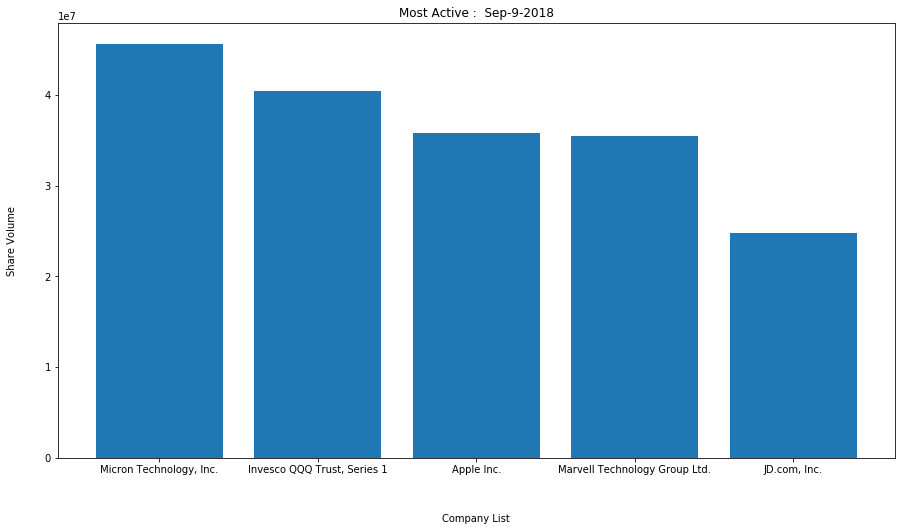

In [522]:
#We are good to go to plot land
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

now = datetime.datetime.now()

plt.rcParams["figure.figsize"] = [15,8]

plt.bar(range(len(nameList)), volumeList)

plt.title("Most Active :  {}-{}-{}".format(now.strftime("%b"), now.day, now.year))

plt.xlabel("\n\n\nCompany List")
plt.ylabel("Share Volume\n\n")
plt.xticks(range(len(nameList)), nameList)

plt.show()

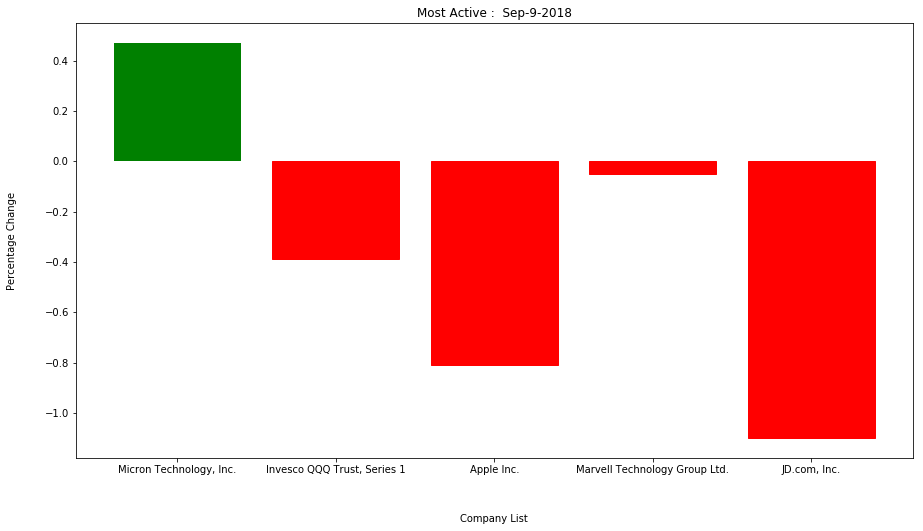

In [523]:
plt.ylabel("Percentage Change\n\n")
plt.title("Most Active :  {}-{}-{}".format(now.strftime("%b"), now.day, now.year))
plt.xlabel("\n\n\nCompany List")

bars = plt.bar(range(len(nameList)), percentageList,color="Green")
for i in range(len(bars)) :
    if(percentageList[i]<0) :
        bars[i].set_color("RED")

plt.xticks(range(len(nameList)), nameList)
plt.show()

# Part B. Timing Comparison
In Quest1 you were asked to write the following code without using the Counter class.
def wordsInStringToDictWordCount(s):
>""" return a dict of words in string and count <br>
>  === wordsInStringToDictWordCount('foo bar bar') -> {'foo':1, 'bar':2} <br>
>  === wordsInStringToDictWordCount('') -> {} <br>
>constraint: MAY NOT USE: Counter <br>
>""" <br>
return {"foo": 2, "bar": 1} <br>


1. Your task is to compare the performance of your code vs. an implementation that uses the Counter class and use pyPlot to display the results.
2. Use timeit.timeit to compute the time for the two functions.
3. Create a string that contains 100,000 words. You may extract from a web page or create the string using a random number generator.
<br><br>
Plot your timing results using a PyPlot bar graph.

So, for this we have creating a dummy string of 1,20,120 words below, from https://www.lipsum.com/

In [524]:
import re
stringOfOneLakhWords = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque vitae nisl quis arcu dictum feugiat. Nulla sed pellentesque elit. Quisque iaculis nibh eget orci consectetur sodales. Donec erat dolor, pretium ut blandit vel, tincidunt et quam. Aliquam hendrerit varius ligula ultricies malesuada. Duis nec nulla vitae purus egestas pulvinar quis ut odio. Donec efficitur id lacus vitae euismod. Praesent in condimentum eros, at maximus orci. Suspendisse ut convallis nisl. Curabitur vel lobortis nisl, in vestibulum lacus. Nunc euismod pellentesque metus sit amet egestas.Sed vitae mi porta, ultrices lacus at, finibus mi. Curabitur elit quam, sagittis eget dui non, gravida ornare diam. Duis viverra euismod ex a tempus. Mauris sit amet nisi tortor. Vivamus id molestie enim, sed maximus turpis. Nullam porta lectus a nunc lobortis, posuere porta nisl volutpat. Donec gravida ipsum nec dolor ultrices, at pharetra magna pharetra. Ut sed pretium diam. Sed varius maximus suscipit. Curabitur volutpat lacinia sapien, sed auctor est. Aliquam posuere velit eu ligula commodo, quis egestas ex ultricies. Mauris tincidunt tempor mi. Nullam nec arcu enim. Donec congue efficitur tempus. Nullam ac est tristique, tristique eros eget, viverra nunc. Sed rhoncus feugiat magna, eget vestibulum augue molestie eu.Maecenas nec dictum ipsum, eget scelerisque lectus. Mauris mattis scelerisque diam. Aliquam at dapibus enim. Maecenas posuere id enim eu interdum. Nunc rhoncus eget ante vel semper. Sed eu elit fringilla, elementum magna ut, eleifend lectus. Suspendisse dictum laoreet turpis ut lobortis. Suspendisse lectus ipsum, viverra eget lobortis quis, commodo non elit. Vivamus fermentum, velit sed egestas consequat, eros libero laoreet mi, in consectetur diam neque non metus. Pellentesque blandit ex in nunc blandit, nec cursus mi consectetur. Mauris nec est eleifend, ullamcorper mi nec, dignissim ex. Ut bibendum risus quis tortor ornare pulvinar. Vestibulum posuere nisi ex, quis venenatis ligula egestas vel. Vestibulum metus erat, facilisis lobortis ex lobortis, efficitur tristique neque. Morbi congue tellus sed velit sagittis ornare.Suspendisse hendrerit erat quis nibh ullamcorper viverra. Aenean facilisis congue ante ut lacinia. Aliquam cursus, felis nec ornare hendrerit, dolor justo ultrices diam, id euismod mi mauris ac enim. Etiam ut hendrerit nisi. Morbi blandit eget velit quis feugiat. Mauris est lectus, finibus eget est non, bibendum pulvinar turpis. Nulla id eleifend elit. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nunc elit nulla, varius et risus ac, bibendum volutpat libero.Suspendisse potenti. Sed sodales dui in arcu laoreet vestibulum. Proin vitae imperdiet leo. Praesent tempus libero odio, vitae hendrerit dui rutrum at. Maecenas pretium tellus augue, a aliquam quam posuere non. Nullam urna purus, convallis et lobortis vitae, pellentesque quis orci. Praesent maximus a purus sit amet iaculis. Maecenas finibus accumsan erat et rutrum. Donec sed viverra lorem. Maecenas a leo volutpat, volutpat purus et, accumsan risus. Fusce felis felis, hendrerit eu cursus in, laoreet convallis ipsum. Donec sollicitudin nec sem non eleifend. Suspendisse auctor, urna dignissim tincidunt dictum, enim lectus interdum augue, non posuere dui magna vel est. Vestibulum ante enim, mollis non purus eu, finibus vehicula lectus. Vestibulum fermentum lorem non nisl ornare, vel malesuada ligula consequat.Maecenas mi risus, congue semper vestibulum id, facilisis at magna. In velit tortor, vulputate non lorem vitae, condimentum interdum sem. Morbi tempus convallis porta. Phasellus eu dui congue dui mattis euismod non id dui. Curabitur vel erat neque. Etiam et mattis eros, at venenatis sapien. Morbi laoreet lacus nec leo sollicitudin, vitae vestibulum diam venenatis. Maecenas quis nisl dui. Aliquam vel tellus felis.Sed interdum nibh sed sodales faucibus. Sed dignissim aliquet facilisis. Nunc et laoreet diam. Curabitur quis suscipit dolor, at ultricies felis. Nunc quis commodo magna. Suspendisse convallis tincidunt ligula, non tincidunt massa imperdiet et. Sed sed sodales neque, et pulvinar ante. Vivamus lectus dui, malesuada ac viverra vitae, laoreet vel nisi. Aenean iaculis sem a leo iaculis, vitae dictum ex pretium. Curabitur dui erat, ullamcorper nec elementum sed, luctus ut metus. Donec at consequat orci. Duis congue lectus elit, a viverra lacus fringilla vehicula.Ut lorem libero, molestie a est vitae, interdum mollis lorem. Praesent mollis arcu in egestas mattis. Vivamus interdum lorem et turpis molestie maximus. Nunc egestas, sapien ac sagittis rutrum, lectus metus molestie dui, ac tempor tortor dolor nec magna. Sed sit amet ligula ligula. Donec massa dui, pulvinar a sagittis ac, fermentum condimentum lorem. Donec congue gravida porta.Pellentesque ullamcorper, ex at lobortis mattis, dolor massa cursus nunc, sodales volutpat dui leo a massa. Proin euismod ante odio, eu luctus orci fermentum eget. Nullam varius turpis vel arcu gravida, semper lacinia nibh euismod. Maecenas tristique porttitor sodales. Nunc sed euismod turpis. Morbi finibus augue semper, pellentesque odio quis, bibendum magna. Vestibulum maximus vel diam sollicitudin congue. Sed commodo ligula facilisis sem rhoncus sollicitudin. Nulla facilisi. Suspendisse porttitor efficitur quam vitae mattis. Aliquam tincidunt dolor nec dolor elementum, eget faucibus purus consequat. Nunc nunc erat, ultricies a ultricies ut, interdum sit amet diam.Morbi tincidunt arcu eleifend tellus rhoncus convallis eget eu quam. Aenean porta condimentum mi sit amet scelerisque. Integer auctor massa eu magna sodales tempus. Curabitur nibh neque, maximus eu tristique at, porta vitae est. Etiam in leo orci. Pellentesque aliquam, ligula eget varius mattis, nunc eros laoreet metus, a ullamcorper nisl augue posuere enim. Quisque a purus orci. Integer faucibus, eros sit amet elementum tristique, lacus libero auctor nibh, vel tincidunt felis quam eget ligula. Fusce finibus porttitor ultrices. Sed lacus purus, vestibulum nec massa at, dictum ultricies leo. Nulla molestie dolor eget justo semper, quis tincidunt tortor interdum. Sed sed vestibulum tellus, sit amet pharetra ligula. In posuere quam non lorem imperdiet, at rutrum ex faucibus. Etiam massa nunc, tincidunt nec feugiat non, euismod quis quam.Donec interdum sodales arcu eu varius. Aliquam placerat sit amet lectus ac ullamcorper. Nam fringilla nibh at dui fringilla consequat. In in enim ipsum. Aenean nec nunc neque. Nulla accumsan ligula eget libero pharetra commodo. Maecenas a dui nec nunc dapibus cursus. Phasellus egestas imperdiet malesuada. Nullam neque lectus, consequat vitae euismod ultricies, commodo eget elit. Phasellus ut scelerisque neque. Cras faucibus, mauris in convallis interdum, enim nisl mattis ipsum, in venenatis velit ex a nisl. Mauris eros erat, dapibus ullamcorper magna a, ultrices pellentesque felis. Cras dolor nunc, fermentum a mollis eget, accumsan varius est.Pellentesque at elit erat. Integer sed ligula sodales, gravida sapien id, vestibulum lacus. Nullam sed pulvinar risus. Suspendisse eleifend egestas est. Nulla eget semper magna, eget fermentum nulla. Vestibulum sit amet leo justo. Integer semper condimentum mauris, quis pretium dui vulputate eget. Duis sit amet justo et velit varius elementum. Suspendisse quis lobortis libero. Aenean iaculis congue interdum. Duis pretium massa vel arcu consectetur scelerisque.Maecenas ullamcorper tincidunt accumsan. Phasellus laoreet turpis laoreet, rutrum mi ac, iaculis diam. Donec bibendum tempor molestie. Proin accumsan vestibulum velit, vitae consequat risus tempus non. Praesent semper massa sed augue rutrum consequat. Aliquam erat volutpat. Cras aliquet malesuada lacinia. Aenean posuere mauris non magna aliquam, a condimentum tellus tempor. Pellentesque in libero non turpis imperdiet egestas. Morbi porttitor lectus rutrum lectus cursus molestie. Quisque quis sem lacus. Donec egestas venenatis faucibus. Nulla facilisi. In quis sem mattis, rutrum mauris et, luctus nisl. Vivamus fermentum rutrum tortor, non elementum eros ullamcorper id. Donec congue dignissim urna pharetra hendrerit.Etiam at laoreet nibh. Fusce venenatis purus non rhoncus malesuada. Sed non diam sodales, tincidunt ex nec, pretium dui. Nullam ut convallis neque. In egestas purus vitae massa blandit porta. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer quis arcu justo. Ut vel iaculis ipsum, eu vehicula risus. Quisque velit ante, convallis non semper quis, rutrum at ipsum. Donec posuere magna ut mauris convallis euismod. Suspendisse pulvinar placerat viverra. Sed fringilla gravida massa, a scelerisque magna vulputate eu. Nulla porttitor imperdiet metus, sed sollicitudin risus aliquet et.Vivamus non rhoncus sem. Vivamus non egestas orci. Sed consectetur quam ipsum, quis convallis risus congue eu. Sed magna tellus, efficitur quis ornare vel, maximus facilisis arcu. Pellentesque pharetra suscipit lacus, ac feugiat orci laoreet ut. Donec gravida justo neque, eu feugiat lectus sodales vel. Integer at varius ex, quis efficitur erat. Suspendisse vel purus eu lectus viverra placerat at non dui. Morbi et arcu eget nulla hendrerit lobortis. Vivamus eget consectetur magna. Duis et eros et augue mollis posuere. In eu ornare odio. Curabitur vel posuere nibh. Integer facilisis, est a aliquam mattis, sapien nisl lacinia neque, sed cursus nulla purus a sapien.Vestibulum sit amet justo a nibh volutpat dapibus. Aenean viverra placerat euismod. Etiam aliquet augue in placerat aliquet. Phasellus ac consequat ex, et dictum nibh. Maecenas eget pretium velit. Nullam bibendum vel urna nec ultricies. Phasellus vel molestie nisl. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc rutrum ac metus eu rhoncus. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. In aliquet ligula non imperdiet laoreet.Nunc et aliquet massa. Donec non porttitor risus. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Sed dui eros, gravida id turpis quis, sollicitudin congue mauris. Vivamus tincidunt urna faucibus nisl sollicitudin, eget lacinia purus viverra. Aliquam vel est eget augue rhoncus pulvinar. Phasellus feugiat diam nisi, quis venenatis enim faucibus eget. Suspendisse et gravida eros. Curabitur vitae orci ornare, venenatis augue nec, convallis felis. Donec egestas erat ex. Morbi sodales sem ipsum, non porttitor massa porttitor nec. Aenean vitae consectetur nisi.Phasellus gravida porttitor orci, vitae iaculis sapien finibus at. Curabitur vel augue interdum, consequat libero non, lacinia nisi. Sed sodales mauris in leo lobortis dapibus vitae in sapien. Fusce feugiat odio lectus, quis congue velit hendrerit eu. Mauris a risus vel orci hendrerit iaculis nec id elit. Quisque at eros nunc. Donec vulputate arcu eu tempus malesuada. Duis consequat massa vel massa facilisis ornare. Cras at neque consectetur, posuere est sed, laoreet quam. Integer bibendum, nunc in bibendum convallis, dui nibh sodales massa, non porta eros augue eget ante. Integer in posuere odio. Nullam sit amet metus pretium, placerat dui et, commodo ligula. Ut augue metus, hendrerit id metus sit amet, sollicitudin maximus lacus.In pellentesque odio tempor libero vulputate, a placerat velit elementum. Donec fringilla bibendum dui imperdiet convallis. Vestibulum fringilla dolor ac ipsum dictum, nec lacinia lacus fermentum. Sed accumsan non nisl id tristique. Nullam felis mi, hendrerit et arcu sit amet, placerat mattis justo. Aenean at ex at est semper vehicula malesuada sed erat. Ut justo ligula, efficitur in nibh ac, finibus ornare eros. Fusce in luctus dolor. Vestibulum pellentesque purus nec velit tincidunt dictum. Suspendisse hendrerit, justo nec finibus facilisis, ipsum dolor porttitor massa, sed suscipit odio urna vel leo. Suspendisse gravida lectus posuere urna scelerisque viverra. Curabitur sit amet pharetra velit. Morbi egestas lorem nisl, quis lobortis odio facilisis sit amet. Vivamus a tellus tellus.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Etiam in scelerisque odio. Aliquam quis vehicula libero. Morbi eu ante sit amet lorem porttitor vulputate in sed turpis. Praesent eu sodales nisl. Phasellus sit amet vulputate dui. Proin mattis diam nec cursus gravida. Vivamus posuere sollicitudin sapien sit amet rutrum. Vivamus eget dolor elit. Suspendisse efficitur libero est, sed pretium eros condimentum ut.Quisque eu ultricies mi, eget ultricies quam. Etiam accumsan condimentum velit, ac finibus orci condimentum sed. Quisque porttitor ut mi non cursus. Quisque pulvinar eu odio ut eleifend. Nam sed orci at nisl placerat blandit sed in arcu. Proin dictum libero sed semper lobortis. Mauris iaculis at lacus et pellentesque.Praesent ut scelerisque enim. Praesent bibendum hendrerit metus nec vehicula. Nullam tempus libero at efficitur tincidunt. Praesent suscipit purus quis nulla mattis eleifend. Aenean nec molestie enim, vitae sollicitudin odio. Aenean in massa tempor massa ullamcorper commodo eu et libero. Ut eu iaculis ligula. Aliquam erat volutpat. Aenean non metus pretium, semper est vel, viverra justo. Quisque et eros turpis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Etiam dignissim eros finibus enim consectetur, at molestie justo finibus. Maecenas luctus velit at magna fringilla malesuada.Pellentesque at neque ipsum. Vestibulum consequat velit at velit facilisis elementum. Quisque sit amet elit facilisis, aliquet libero non, facilisis leo. Quisque congue porta orci in suscipit. Phasellus placerat est diam, ac ultricies libero auctor eget. Aenean euismod, leo id cursus tincidunt, justo sapien scelerisque est, et lacinia sapien velit at elit. In sit amet sem et nisl facilisis tincidunt. Proin lobortis tempor ex, ut commodo nibh elementum eu. Curabitur accumsan tellus sit amet nulla tincidunt porttitor. Aenean vitae tincidunt orci. Sed aliquet vulputate sem sodales sagittis. Maecenas porta, massa sed interdum volutpat, erat eros egestas arcu, nec elementum tortor quam sed lacus. Maecenas finibus fermentum mauris non sagittis.Morbi auctor convallis egestas. Proin faucibus augue diam, non bibendum metus tincidunt a. Fusce et feugiat massa. Morbi molestie ligula sit amet ex euismod elementum. Pellentesque elementum ligula ac sem rhoncus gravida. Suspendisse in dignissim velit, sit amet condimentum magna. Nam ut lectus vel neque elementum posuere eget quis libero. Praesent ut aliquam quam.Sed dignissim ullamcorper mauris. Donec aliquam at tellus id mollis. Donec sit amet lorem eu ipsum lacinia malesuada. Sed tincidunt, dui ac egestas placerat, dolor sem venenatis purus, sit amet placerat risus purus in nibh. Donec bibendum est at augue ornare vestibulum. Aliquam scelerisque facilisis risus, vel vestibulum urna placerat convallis. Integer tristique condimentum elit, eu hendrerit dolor pulvinar ac. Proin eu tellus non nibh faucibus semper. Sed dapibus sapien id suscipit pharetra. Morbi eleifend tristique eros sit amet vulputate. Fusce augue justo, fermentum nec lobortis eu, tincidunt vel ante. Aenean in iaculis dui.Aenean a nisi et lectus ullamcorper feugiat. Fusce erat est, sollicitudin sit amet nibh et, laoreet semper eros. Suspendisse potenti. Pellentesque risus dolor, laoreet et laoreet in, dapibus eu felis. Vivamus massa velit, sagittis ut arcu vel, cursus hendrerit sapien. Nam dapibus congue nibh non dictum. Cras sit amet tincidunt lorem, et consequat quam.Pellentesque viverra, nisl ac varius vulputate, metus turpis tincidunt urna, vel efficitur lorem est eu nisl. Nullam vestibulum pharetra ante, et laoreet turpis eleifend vel. Nulla dignissim cursus consectetur. Nam feugiat felis lorem, pulvinar accumsan massa maximus vel. Phasellus suscipit augue velit, non vehicula sem pellentesque sit amet. Cras dapibus congue hendrerit. In suscipit dignissim diam vitae consectetur. Vivamus maximus mi sit amet augue tristique, in mattis est egestas. Mauris scelerisque gravida ultricies. Sed condimentum non lacus eget feugiat.Donec dictum odio a tellus maximus pretium. Fusce dapibus est a tristique hendrerit. Pellentesque quam augue, eleifend ac pulvinar id, commodo eget nunc. Fusce viverra maximus velit a rhoncus. Donec quis facilisis nulla. Nam consequat ligula vel nunc elementum lacinia. Vivamus sed fringilla massa, quis bibendum justo.Curabitur tempor luctus turpis. Praesent ut libero eros. Maecenas volutpat mattis placerat. Nunc pulvinar ante libero, vel bibendum ex dapibus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas ornare risus ligula, vel fringilla elit ultrices sed. Maecenas et erat magna. Praesent mi elit, pulvinar eu mi a, finibus consectetur odio. Morbi malesuada, dui vitae convallis condimentum, velit ante fermentum tellus, ultrices gravida purus ex vitae est. Nunc in turpis turpis. Maecenas condimentum commodo sapien quis ornare. Quisque a sapien metus. Nunc condimentum elit massa, et porta nulla fermentum faucibus.Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse dapibus massa non feugiat tincidunt. Curabitur sollicitudin dignissim lacinia. Phasellus metus sem, vestibulum id nunc et, tempus scelerisque massa. Cras nec pretium libero. Quisque tincidunt posuere purus non scelerisque. Donec pretium metus nulla, ut malesuada lacus faucibus eu. Quisque orci mauris, mollis vitae fringilla id, accumsan sit amet ligula. Integer sed leo a orci dictum porttitor. Morbi dapibus hendrerit mi. Quisque quis augue ante. Maecenas purus mauris, molestie ac placerat non, sagittis ac augue. Mauris luctus a elit ut facilisis. Cras id neque lorem.Proin commodo leo ac accumsan tempus. Etiam vitae pharetra velit, tempor ultrices orci. In ligula odio, maximus nec tortor in, egestas tempus magna. Curabitur neque ipsum, vehicula quis dictum sit amet, posuere quis magna. Aliquam sed auctor mauris, sit amet porta erat. Nunc et risus at ante viverra consequat maximus eu felis. Suspendisse viverra efficitur lorem a bibendum. Vivamus ultrices justo vitae est rhoncus sodales. Sed convallis vehicula eros, et rutrum est condimentum in. Aliquam id ipsum eget nunc varius fermentum.Nulla pellentesque enim tellus, non fringilla purus venenatis id. Ut pretium risus turpis, vitae suscipit turpis mollis eu. Praesent sit amet commodo diam. Duis molestie orci auctor, auctor est ut, imperdiet orci. Proin tempor eros sed ipsum molestie, sed laoreet erat mattis. Nunc sed ligula sit amet dui pellentesque vehicula. Duis scelerisque rhoncus mi vel laoreet. Morbi et ante vitae mi rutrum porta a a ex. Donec purus est, pellentesque quis vestibulum sit amet, fringilla vitae risus. Ut facilisis feugiat aliquam. Mauris id diam dui.Vestibulum a pretium metus, eu iaculis tortor. Morbi fringilla pharetra neque, vel euismod nulla sagittis eu. Suspendisse facilisis lacus vel neque maximus tempus. Aenean bibendum pulvinar mattis. Phasellus aliquet, odio ut convallis malesuada, arcu dolor hendrerit odio, nec bibendum nunc tellus at lorem. Duis id metus vel quam dictum vestibulum vitae a nulla. Ut nec metus a enim facilisis sagittis a sit amet quam. Praesent aliquet ut risus id scelerisque. Etiam venenatis a tellus a rutrum. Proin sed sodales enim. Nulla nec erat leo. Fusce elit ante, hendrerit ac fringilla ac, laoreet at orci.Morbi ut finibus nisl. Nulla auctor metus rhoncus neque dignissim, sed rutrum lacus ultrices. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec ullamcorper ipsum et est tincidunt faucibus. Vivamus et gravida massa, sit amet auctor quam. Nullam posuere massa sodales felis malesuada porttitor. Proin in orci sed justo blandit gravida laoreet eu magna. Morbi eget risus eros. Phasellus nec vulputate turpis. Maecenas in mi sapien.Nulla sed rutrum nulla. Cras vestibulum nulla non nisl lacinia, hendrerit tristique eros luctus. Nulla iaculis lectus dictum nulla tincidunt lacinia. Aliquam erat volutpat. Nulla sodales leo metus, vel fringilla tortor egestas sit amet. Fusce euismod consectetur enim, at ultrices sem scelerisque sit amet. Nam sed molestie mauris. Donec vel ligula purus. Fusce pretium orci quis lobortis convallis.Sed rutrum justo vel purus ultricies dapibus. Nunc at finibus mi. Morbi convallis, sem ac gravida sagittis, enim augue ultricies elit, nec facilisis lectus magna at ligula. In consequat, eros id posuere rutrum, elit mi maximus tellus, eu lobortis dui tellus eget magna. Nulla eget feugiat purus, nec lacinia elit. Nunc efficitur tincidunt lacus, id mattis lacus interdum a. Maecenas maximus lorem metus, lacinia fermentum mauris placerat ac. Integer in mattis orci, non mattis neque. Suspendisse porta lorem sed purus dignissim, quis imperdiet leo varius. Aliquam a metus felis.Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam vel posuere nunc, id ultrices diam. Ut porttitor et sapien sed rutrum. Praesent posuere et lectus in lobortis. Donec consequat mauris eu tellus hendrerit faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur vitae elementum sem. Fusce a pharetra felis. Fusce rhoncus ac tellus vitae vehicula. Aliquam venenatis nisi sed sapien eleifend ultrices. Donec tortor nisl, varius sit amet enim scelerisque, fringilla sollicitudin mi. Nullam congue porttitor venenatis. Maecenas in fermentum nisi.Aenean dictum sed nibh a lacinia. Ut sit amet semper mi. Nulla urna est, laoreet sollicitudin aliquet ut, porttitor quis lorem. In gravida justo porttitor, pretium massa non, maximus mi. Donec maximus, justo sit amet egestas dictum, ligula mauris posuere lorem, eget ornare lorem augue nec ipsum. Integer tristique vulputate mauris, at tempor sapien tempus in. Sed dapibus fringilla dui laoreet dignissim.Sed eros turpis, congue sit amet lacus a, sollicitudin volutpat eros. Nullam eget arcu ac dui vehicula sodales tempor a ex. Pellentesque mi tellus, volutpat ut blandit vitae, porta vitae neque. Fusce elementum sed diam sit amet placerat. Phasellus sed risus arcu. Suspendisse potenti. Ut metus turpis, elementum et enim sed, iaculis feugiat magna. Proin scelerisque diam leo, eget dictum lorem lacinia non. Nam vel lorem ut felis bibendum ullamcorper. Suspendisse et congue dui.Mauris pretium vestibulum urna, laoreet aliquet felis semper a. Donec at arcu magna. Mauris sed viverra odio, at consequat magna. Suspendisse nisl dui, egestas sed sem sed, iaculis elementum lacus. Suspendisse nec aliquet quam. Phasellus mattis ligula nec lorem accumsan, ac posuere lectus pellentesque. Donec condimentum dictum vulputate. Sed gravida vehicula nisl, aliquet elementum turpis interdum vel. Ut luctus mattis ipsum a gravida. Proin ac neque mattis, blandit erat sit amet, ultrices lorem. In non ligula eu felis faucibus vehicula et at enim. Donec porttitor pharetra arcu sed imperdiet. Duis congue odio id magna pretium pulvinar a ac leo. Donec mi mauris, feugiat at iaculis elementum, venenatis sit amet ex. Sed sollicitudin pharetra fringilla. Mauris tincidunt, lacus vel eleifend suscipit, augue orci elementum lacus, scelerisque luctus elit ex et purus.Nunc quis leo id nisi lobortis aliquet. Curabitur condimentum nisl ligula, eu sodales enim lobortis sed. Integer id dictum turpis. Sed non est mi. Vivamus quis massa lorem. Proin vitae lorem eu purus vehicula accumsan ut eu felis. Integer commodo molestie nulla eget rutrum. Aenean ac sem tellus. Sed nec gravida metus. Aliquam erat volutpat. Integer cursus dapibus metus quis pretium. Sed sit amet pulvinar nibh. Etiam rutrum metus non eros pretium, facilisis eleifend lacus aliquet.Sed vel eros elementum, tempus nulla a, congue massa. Nunc placerat pulvinar dolor nec ullamcorper. Curabitur ut convallis elit. Donec at lorem mauris. Donec erat turpis, pretium sed faucibus a, imperdiet ac velit. Mauris a augue eu leo porta sagittis. Nullam dolor lorem, vehicula ut porta et, malesuada eget nisl. Sed eu augue lacus. Suspendisse malesuada interdum efficitur. Mauris pellentesque fringilla sapien, gravida congue elit consequat et. Mauris convallis purus et magna tincidunt, eu maximus lacus pretium. Nunc at felis elementum nunc molestie mattis. Fusce mollis sagittis elit ac luctus. Pellentesque ac cursus neque.Fusce vulputate erat et nunc cursus, cursus sodales neque tempus. Pellentesque scelerisque neque tincidunt ante vehicula, eu finibus arcu lobortis. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Ut non orci et massa facilisis ultricies. Donec pretium lorem at sagittis commodo. Morbi euismod faucibus sollicitudin. Cras sed laoreet mauris. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aenean sed volutpat nisl. Suspendisse at convallis neque. Quisque purus felis, egestas sed risus eu, cursus congue lacus. Mauris ac pellentesque dolor. Nunc sit amet facilisis urna. Praesent interdum ligula tellus, eu ullamcorper mauris pellentesque vel. Integer tempus ipsum diam, tristique molestie felis porta non. Vestibulum ac mi fringilla nisi dignissim dignissim.Sed eu vehicula dui. Praesent euismod turpis tellus, in vehicula mi tincidunt a. Vestibulum quis ipsum lectus. Curabitur tincidunt dui arcu, faucibus dapibus enim auctor finibus. Quisque consectetur libero massa, non pharetra enim dictum nec. Donec vestibulum nisi ligula, sed iaculis mauris faucibus id. Suspendisse vel fermentum magna. Maecenas ultrices eu velit vel convallis. Aenean fermentum euismod enim vitae iaculis. Praesent ut mauris lectus. Vivamus eget magna elit. Donec eu semper erat, id porttitor nisi. Vestibulum ultricies nunc sed tortor sollicitudin egestas. Phasellus ipsum magna, vulputate at ullamcorper ac, congue ac tellus. Integer risus neque, aliquet vitae condimentum volutpat, ultrices ac leo.Maecenas blandit ipsum lobortis arcu porta tincidunt. Sed et nibh enim. Curabitur ullamcorper mauris in efficitur porta. Quisque sed velit justo. Nunc lacinia elementum massa in tristique. Etiam ut lacinia mauris. Pellentesque ornare gravida molestie. In magna magna, facilisis at accumsan eu, interdum tempor mauris. Donec sit amet tristique ipsum. Nullam vitae tempor mauris. Cras elementum ullamcorper nisi, sit amet bibendum justo tincidunt non.Aliquam consequat, metus a egestas semper, tellus libero pellentesque magna, ut pharetra dui orci a sem. Sed varius felis ex, laoreet mattis ante lacinia ultrices. Donec vulputate tincidunt ex, id ultrices justo ornare sed. Aenean sollicitudin nunc eu nibh imperdiet, at mollis sapien cursus. Sed sodales, risus eget venenatis sodales, augue eros bibendum dui, sed ornare lorem ligula eget leo. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas viverra fermentum leo, a sodales orci. Phasellus vitae ligula metus. Duis congue nibh ac egestas vestibulum. Curabitur varius dui aliquet, efficitur dui non, molestie orci. Cras tincidunt posuere mauris at mattis. Etiam mattis eros vitae lacinia gravida.Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus consectetur nisi in accumsan rhoncus. Cras cursus risus id blandit semper. Nullam est nisi, sollicitudin fringilla cursus non, fringilla sit amet dui. Cras euismod sit amet erat eu placerat. In viverra facilisis pellentesque. Donec faucibus egestas nisl, vel eleifend leo viverra vel. Vestibulum ante lectus, dictum quis gravida sed, vestibulum at mi. Suspendisse velit urna, finibus eu imperdiet at, dictum et nibh.Aliquam risus eros, imperdiet sit amet semper a, egestas aliquet dui. Aenean pharetra sem a ultrices porta. Nunc mi augue, maximus ut congue eu, hendrerit eu neque. Cras nec ullamcorper diam, nec pharetra tortor. Vestibulum volutpat non lacus sed mattis. Praesent in finibus ipsum. Etiam nec dui condimentum lectus ultricies dapibus eu at tellus. Sed vitae accumsan nulla. Morbi ultricies, orci quis finibus mollis, felis eros eleifend nulla, at facilisis diam ante sed augue. Cras placerat felis in eleifend commodo. Fusce ornare vel urna fermentum vehicula. Morbi eget dui vitae nisi fermentum auctor. Sed aliquet placerat facilisis. Etiam porta vehicula felis vitae finibus.Pellentesque blandit justo non venenatis porta. Sed elementum orci non tellus sodales, a facilisis dolor vehicula. Nulla viverra erat ac ultricies fringilla. Curabitur vel enim eros. Sed quam nisl, convallis quis placerat eu, pulvinar id massa. Phasellus vel ligula elit. Maecenas posuere neque quis risus pharetra pulvinar. Phasellus ligula lorem, ultricies bibendum porta ut, laoreet cursus lacus. Pellentesque nisl turpis, eleifend a nulla id, maximus suscipit ligula. Phasellus id semper purus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Nam eget purus turpis. Suspendisse ullamcorper convallis est, quis dictum massa iaculis nec. Duis non consequat mi. Phasellus tempus semper vulputate. Nulla ac diam vel mi ultrices efficitur in id odio.Ut sed ligula sagittis, tempor risus ut, euismod dolor. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Integer rhoncus dapibus tincidunt. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nam vehicula laoreet turpis, quis fringilla justo finibus id. Nullam rutrum blandit tellus, ac mattis nisi aliquam quis. Praesent id felis imperdiet, mattis nibh at, ullamcorper tortor. Nulla bibendum rutrum fringilla. Nullam eget urna lacinia, dignissim lorem ac, convallis risus. Maecenas augue metus, scelerisque eget sagittis at, fringilla id est. In sapien nunc, suscipit et aliquet eu, convallis at tortor. Proin purus lectus, lacinia nec suscipit a, facilisis eu nisl.Pellentesque imperdiet ligula et dapibus congue. Suspendisse ornare vehicula interdum. Nunc nec mauris quis sapien convallis sodales. Phasellus malesuada consectetur neque, et finibus lectus maximus eu. Integer posuere, justo nec pellentesque blandit, dui tellus eleifend ante, non dapibus nunc orci et diam. Vivamus iaculis justo at tortor vulputate, vel scelerisque velit tincidunt. Suspendisse hendrerit urna eget neque scelerisque finibus. In ut enim vel magna porta scelerisque. Quisque feugiat lacinia erat sed sagittis. In in lacus id nisl efficitur facilisis. Suspendisse a malesuada arcu. Quisque tristique dui id auctor commodo. Mauris vel tellus id urna iaculis dignissim. Quisque feugiat fringilla lobortis. Suspendisse suscipit sed elit sit amet finibus.Curabitur condimentum sagittis sem, nec imperdiet sapien rhoncus sed. In efficitur nisl nec eros tempus, vitae laoreet augue porttitor. Maecenas vel venenatis purus. Aliquam erat volutpat. Duis et ipsum vitae diam hendrerit ultrices non quis ligula. Nullam non tellus ex. Mauris ac ex venenatis, volutpat dui at, lacinia sapien. Aliquam erat volutpat. Cras ac orci vel mi fringilla vestibulum ac eu tellus. Quisque scelerisque non augue vel lobortis.Ut laoreet lectus accumsan lacus imperdiet efficitur. Donec finibus mauris at justo vestibulum iaculis. Nunc in rutrum elit, eu scelerisque erat. Pellentesque tristique blandit tincidunt. Morbi condimentum erat vel metus sollicitudin, sit amet euismod nibh porta. Donec in aliquam tellus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque libero tortor, venenatis dictum porta venenatis, imperdiet quis tellus. Suspendisse condimentum enim sit amet sagittis molestie. Phasellus aliquet id mi sed faucibus. Duis in elementum magna, egestas condimentum quam.Nam rhoncus felis eu ipsum congue finibus. Nullam malesuada ante et risus ullamcorper, eget consequat diam imperdiet. Suspendisse lacus erat, molestie id lectus vitae, iaculis faucibus sapien. Sed accumsan tristique tellus, eget placerat sapien congue id. Ut aliquam enim arcu, quis facilisis justo tempus sit amet. Donec aliquam convallis velit vel sagittis. Cras dolor est, imperdiet eu orci sed, ullamcorper elementum est. Suspendisse potenti.Mauris consequat mi a augue accumsan, vitae dictum justo porttitor. Nullam porta felis quis vestibulum blandit. Vivamus mattis dui nec efficitur fringilla. Sed congue ullamcorper enim a euismod. Donec tristique iaculis odio, vel consectetur nulla hendrerit ac. In et odio imperdiet, vestibulum ex sit amet, imperdiet sem. Fusce dapibus nunc diam, ac condimentum augue faucibus a. In vitae ullamcorper elit, eget varius neque. In hac habitasse platea dictumst. Sed ultrices vestibulum pretium.Curabitur ipsum mi, maximus id placerat ornare, sodales non arcu. Phasellus consequat finibus lacus, non dignissim metus malesuada eget. Nullam ex magna, ornare non ex non, dignissim mollis purus. Nam sed sodales nulla. Proin eget eros porttitor, tincidunt neque eu, ullamcorper nibh. Curabitur pulvinar diam id diam pretium luctus. Nam convallis id lectus vel commodo. Praesent augue dolor, imperdiet at molestie vel, facilisis eget metus. Pellentesque sodales quam in lorem faucibus tempor. Phasellus lectus felis, egestas commodo orci et, efficitur tempor eros. Integer enim metus, sodales in lacinia non, hendrerit ut magna. Etiam eu turpis at dolor cursus dictum at at odio. Curabitur mauris leo, dignissim eget lorem non, ultricies pharetra diam. Praesent malesuada ut purus nec tempus.Ut porta aliquam metus ut congue. Ut faucibus eget libero ut ornare. Aenean rutrum pretium est non venenatis. Aliquam elit dui, faucibus ac enim id, posuere tempor nisi. Nullam nisi orci, tristique sed elit quis, aliquet pulvinar eros. Mauris id arcu et arcu fermentum vulputate. Morbi ac pharetra purus. Duis dignissim congue libero sit amet tristique. Maecenas suscipit ornare mattis. Fusce odio arcu, cursus id rhoncus sit amet, tincidunt non elit.Maecenas dapibus a ex eget faucibus. Sed ut ligula eu nibh hendrerit gravida. Curabitur justo ligula, tempor eleifend iaculis a, iaculis vel lacus. Fusce aliquam tincidunt aliquam. Nunc et ipsum et mauris volutpat pretium. Morbi sollicitudin sit amet felis a tristique. Curabitur sed odio sagittis, dapibus dui vitae, volutpat velit.Suspendisse potenti. Vivamus dignissim sem ac erat dignissim, ut gravida eros sodales. Sed ac tellus diam. Donec vehicula non ex cursus sollicitudin. Nunc sed neque varius, aliquet odio at, iaculis dolor. Sed faucibus tempor quam, non pharetra velit vulputate eu. Donec tempor ultrices neque, placerat elementum magna congue quis. Etiam cursus facilisis mauris a suscipit.Curabitur at dui nec nulla ullamcorper maximus sed laoreet ante. Etiam mollis justo in massa condimentum, a tincidunt eros fermentum. Donec vulputate mauris in nulla semper, luctus hendrerit purus laoreet. Etiam vulputate ultrices enim ac euismod. Ut pulvinar neque eget mollis ornare. Donec nec neque a magna scelerisque porta ultrices ut neque. Phasellus ac blandit tellus. Vestibulum eu ipsum vel libero ornare gravida a a quam.Aenean ac arcu eget ante elementum posuere. Sed aliquam mattis neque, at elementum nisl sollicitudin eget. Nam lobortis erat est, nec pulvinar mi blandit vitae. Vivamus vel tellus aliquet, placerat lorem id, efficitur dui. Donec varius feugiat sapien sit amet imperdiet. Cras hendrerit, sem sed sagittis maximus, libero felis finibus justo, a fermentum ipsum erat vel lorem. Ut feugiat ante lectus, ut consectetur elit lobortis vitae. Nullam rutrum semper nisi. Sed eget eros urna. Nulla porttitor ipsum massa, vel euismod tellus ornare auctor. Phasellus egestas tempor finibus. Nullam et justo egestas, molestie augue sagittis, placerat libero.Donec vitae elementum ante, commodo ultricies lorem. Aliquam malesuada massa mi, non consequat mauris mattis sit amet. Pellentesque sollicitudin dignissim ultricies. Ut sed mauris justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. Vivamus pharetra neque at lorem sagittis suscipit. Pellentesque vel viverra velit.Vivamus vestibulum lacinia enim non pulvinar. Nulla at dolor congue, tempus justo et, rutrum quam. Sed posuere tempor ex non efficitur. Vestibulum a eros ut purus vehicula pulvinar. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Donec maximus tincidunt dui sit amet tincidunt. Maecenas aliquam nulla turpis, id venenatis risus pharetra vel. Cras id tempor turpis. Suspendisse sit amet elementum tellus, a cursus massa. Sed elit mi, auctor at viverra eu, suscipit eget erat. Pellentesque dignissim fermentum elit nec ullamcorper. Sed faucibus egestas justo, feugiat rhoncus orci semper at. Sed arcu velit, volutpat nec ligula ac, mattis elementum sapien.Aliquam quis nulla imperdiet ex imperdiet euismod ac ac metus. Fusce sed metus interdum velit tincidunt mattis sed placerat enim. In a justo ut magna molestie facilisis. Etiam tincidunt fermentum purus, nec iaculis tortor sodales a. Proin nulla nulla, pellentesque et mollis nec, ultricies at tortor. Sed at tellus in augue dignissim vehicula. Pellentesque vel magna felis. Suspendisse hendrerit non nisl a porta. Ut tellus magna, rhoncus non tempor quis, elementum nec turpis. Integer sagittis dignissim hendrerit. Aenean imperdiet neque sem, vel efficitur massa cursus in. Sed vel scelerisque nisl. Proin felis lorem, porttitor non neque vel, ultricies convallis turpis. Sed vel tincidunt nibh, quis pretium metus.Suspendisse ante quam, molestie ut lobortis ac, condimentum sed metus. Maecenas efficitur sem at libero condimentum iaculis. Pellentesque id interdum risus, in iaculis turpis. Nunc lobortis augue nec posuere tempus. Sed vulputate eget nunc sed mollis. Nunc ut augue sem. Aliquam sit amet pellentesque metus. Sed rhoncus turpis ut risus consequat feugiat eu eu sapien. Suspendisse blandit eros sit amet lectus cursus faucibus. Donec ultrices pulvinar lacus, in venenatis elit tristique vel. Proin sagittis orci malesuada, iaculis urna nec, tempor mi.Praesent feugiat tincidunt lacus. Nulla ac magna nec ligula fringilla eleifend eu eget velit. Pellentesque ornare nec nunc ac faucibus. Nulla tristique turpis nulla, sed congue enim vestibulum facilisis. Mauris finibus leo aliquam dolor porta auctor. Donec cursus malesuada lacus, nec rhoncus turpis. Quisque felis turpis, viverra ut elit lacinia, tincidunt viverra risus.Curabitur ante quam, lobortis in lectus nec, vulputate porta leo. Vestibulum eu molestie ante. Sed ultricies lectus ut metus consequat, vitae pretium tellus ultrices. Vivamus ultricies, felis sit amet maximus commodo, libero tellus aliquet enim, consequat dignissim nisi erat eu tortor. Donec placerat ligula nunc, at lacinia nulla efficitur in. Vestibulum magna tortor, egestas sed tempus ut, porta eget urna. Proin iaculis commodo tempus. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur quis sem vitae nisl aliquet bibendum. Mauris rhoncus dapibus dui, sit amet tempor risus sagittis sit amet. Nullam sollicitudin dolor ut consectetur aliquet. Nullam vitae mauris venenatis, eleifend orci eu, auctor ante. Morbi risus risus, volutpat et dolor nec, viverra laoreet turpis. Praesent consectetur lacus a mi semper consequat. Aenean quis tortor nibh. Aliquam posuere, metus eget dignissim consequat, arcu nibh scelerisque dolor, sed rhoncus dolor elit et mi.Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Ut tempor faucibus quam ac imperdiet. Nam eu ante rhoncus, tincidunt mi id, iaculis nulla. Maecenas et magna velit. Mauris posuere sem in pulvinar vulputate. Ut accumsan quis leo nec imperdiet. Sed a dictum enim. Ut eget scelerisque diam.Quisque ullamcorper consectetur libero, sit amet maximus felis imperdiet sed. Vestibulum id iaculis dui, ut efficitur leo. Nunc auctor, augue ut posuere vulputate, felis risus lobortis sapien, nec bibendum dui eros sed lorem. Cras cursus dolor purus, sed iaculis ligula sollicitudin a. Pellentesque eleifend vitae enim at pellentesque. Fusce in posuere sem. Quisque dictum in sapien in tincidunt. Maecenas eget facilisis lorem, id iaculis augue. Phasellus mauris odio, porta id orci id, sagittis scelerisque dui. Cras quis magna est.Nulla hendrerit lectus massa, id porttitor mi volutpat ut. Vivamus sed pretium ligula. Maecenas venenatis eget eros non bibendum. Sed scelerisque efficitur mi, in feugiat tellus. Nunc sed enim volutpat ex fermentum dignissim id eu sapien. Vestibulum id justo accumsan, pharetra turpis sed, malesuada leo. Donec pulvinar lectus diam. Nam volutpat eros ut diam tempor hendrerit. Morbi facilisis nulla ac nisi sollicitudin, et vestibulum lacus sodales. Donec molestie, est quis rhoncus rhoncus, nibh nulla iaculis sapien, id rutrum elit justo in diam. Fusce non mollis quam. Quisque fermentum ligula massa, at faucibus neque luctus nec.Aenean luctus condimentum dolor, at laoreet metus tempus in. Cras vel lorem eget nisi molestie efficitur. Morbi condimentum libero et ante ultrices tempus. Sed tempus mi non magna lobortis ultricies. Sed efficitur nisl justo, id tempus tortor feugiat ut. Proin id lacus tellus. Nunc aliquam, enim at fermentum tristique, risus metus aliquet urna, ut rutrum ipsum augue ut sapien. Mauris facilisis nulla ante, eleifend dictum ligula consequat id. Pellentesque ullamcorper erat nisi, sit amet lacinia massa ultricies ut. Donec ornare pellentesque ultricies. Donec viverra felis ac arcu molestie finibus.Pellentesque mauris est, dignissim sit amet lectus ac, scelerisque tincidunt libero. Maecenas sed tellus nec lacus placerat lacinia eget non justo. Maecenas id dui nulla. Morbi vel arcu a purus pretium feugiat in quis sem. In vel eros in est ultricies lacinia. Vivamus congue semper purus, ultrices maximus justo vehicula a. Proin aliquam, massa eu sodales suscipit, orci est ornare augue, et sollicitudin nisi nisi et dui. Morbi nunc nunc, feugiat non ante quis, placerat ornare elit. Praesent ut pulvinar sapien.Pellentesque auctor sapien quis nibh semper imperdiet. Maecenas at mauris vitae eros mollis accumsan a non justo. Aliquam ac ligula fringilla tellus cursus tristique. Nullam eu quam a odio blandit rutrum eu quis ipsum. Nam porta quam odio, sit amet euismod purus laoreet id. Vivamus aliquet neque vitae magna congue faucibus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris vestibulum pulvinar metus ornare posuere.Praesent dignissim fermentum ante at laoreet. Maecenas malesuada posuere nibh. Donec eu orci non ipsum sodales molestie quis et mi. Sed a pharetra felis. Vestibulum imperdiet sed eros ac ultricies. Aliquam aliquet ipsum vel nibh porttitor ornare. Quisque imperdiet malesuada sagittis. Curabitur vitae ultricies metus. Curabitur a tortor arcu.Nunc eget velit dui. Quisque non quam at libero condimentum consequat. Morbi ac sapien in orci aliquam accumsan. In pretium lorem ut felis facilisis ornare. Sed nec dolor eget ligula ultrices accumsan eu et lectus. Vivamus tristique nulla ut lorem maximus, molestie molestie nisl ornare. Nunc luctus elit dolor, at tincidunt nunc mollis et. Pellentesque quis ligula ut nulla ullamcorper placerat.Curabitur leo ligula, mollis eu lectus at, lobortis maximus quam. Sed mollis sit amet magna eu euismod. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Ut faucibus mattis dui eu blandit. Vivamus in vehicula nulla. Mauris sed bibendum tellus. Donec purus enim, hendrerit in eleifend sed, tempus feugiat enim. Phasellus pulvinar hendrerit erat, nec vulputate libero molestie at. Donec erat tortor, iaculis vitae est ut, molestie scelerisque justo. Morbi finibus dolor ut risus pretium, nec semper magna sagittis. Cras sed aliquam purus. Curabitur ullamcorper pretium volutpat. Sed accumsan id mi ut posuere. Praesent suscipit consequat elit, vitae ultrices nunc sodales sed. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum eu interdum ligula.Praesent dignissim vitae nisl quis dapibus. Suspendisse pulvinar leo sapien, ut congue ex ullamcorper vel. Nam elementum urna nec nunc posuere convallis. Nullam sed tortor at leo consectetur luctus. Phasellus ut finibus purus. Aliquam massa magna, scelerisque vitae lectus at, egestas laoreet eros. Sed convallis hendrerit metus, nec consequat lacus ultrices a. Suspendisse ipsum neque, commodo non eros non, efficitur luctus felis. Cras condimentum dictum sem. Aenean ut justo pellentesque, molestie metus sit amet, mollis lorem. Curabitur consectetur blandit odio, sit amet consequat justo laoreet ac. Curabitur rhoncus, magna a varius pellentesque, velit est condimentum lorem, at mollis lacus leo a purus. Nullam at gravida arcu, vitae semper dolor. Maecenas placerat, nunc nec rhoncus mattis, risus turpis accumsan ligula, eget feugiat eros arcu non libero.Etiam nec nisi sit amet nunc fringilla ultrices. Sed malesuada elit nulla, sed egestas purus malesuada ut. Nullam porta risus in nulla facilisis rutrum. Nullam sollicitudin metus a ex lobortis, in mollis libero tincidunt. Nullam id diam sapien. Pellentesque scelerisque, sem ut sagittis egestas, mauris sem finibus magna, eu pretium magna ex non tellus. Etiam egestas velit massa, nec ornare dolor cursus eu. Maecenas non tortor in ex ultrices convallis a id dui. Pellentesque lobortis efficitur erat, id rhoncus tortor posuere et. Aenean ullamcorper vitae est sit amet ultricies. Suspendisse malesuada, arcu sit amet rhoncus scelerisque, purus libero ultrices lorem, quis sagittis orci lectus non magna. Donec consequat ut enim sed posuere. Proin sollicitudin non ligula nec vehicula.Mauris pretium, est ac lacinia vulputate, eros turpis dapibus ligula, at commodo diam velit porttitor neque. Praesent elementum rutrum orci ac ultricies. Suspendisse volutpat cursus lectus a convallis. Ut a elit lorem. Integer sodales nunc a gravida ultrices. Sed quam urna, mattis nec mi vitae, vulputate facilisis eros. Fusce blandit dui felis, a molestie ante dictum et. Vestibulum feugiat vestibulum pretium. Nulla auctor porttitor erat eget venenatis. Etiam posuere ut nulla id pulvinar.Ut tristique rhoncus orci sit amet fringilla. Aenean vulputate nunc quis lorem lacinia, eget condimentum leo placerat. Nunc interdum eros quam, non interdum purus gravida vel. Ut ut dui vestibulum turpis rutrum laoreet. In fermentum sem elit, nec vulputate justo eleifend id. Aliquam pulvinar accumsan nibh ac pharetra. Donec venenatis nibh sit amet tempor feugiat. Sed ullamcorper a erat ac porttitor. Pellentesque efficitur luctus metus, eget bibendum nunc sodales a. Proin vitae pretium ligula. Nunc sed semper quam.Aliquam eleifend accumsan augue pellentesque faucibus. Curabitur ultricies sed nulla ullamcorper venenatis. Donec finibus dolor quis metus semper hendrerit. Etiam eget sagittis lectus. Nulla at pulvinar metus, quis lacinia metus. Nam non placerat lectus. Donec ipsum lorem, luctus vitae consectetur at, lacinia sed mauris. Nam porta egestas ex suscipit tincidunt.In tempus turpis at nibh auctor lacinia. Nunc lacinia porta justo, vel laoreet diam mollis at. Fusce accumsan aliquam tempor. Quisque ornare ornare tortor non consectetur. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean consequat feugiat nisl ac blandit. Quisque aliquet at odio sed pulvinar. Maecenas dapibus, quam ut euismod finibus, dui ipsum pharetra nulla, et mattis urna diam nec libero. Aliquam erat volutpat. Aliquam vulputate maximus enim in ullamcorper. Maecenas id ante nec ligula suscipit tristique. Sed tempor leo et erat sagittis interdum. Etiam bibendum id dolor id bibendum. Pellentesque in nisi id justo posuere vestibulum. Praesent dolor tellus, tincidunt sed imperdiet ac, pulvinar eu est.Sed id massa dui. Duis rhoncus magna id erat luctus ornare. Sed lacinia eget tellus in sagittis. Pellentesque eu augue consequat, maximus leo at, condimentum nunc. Aenean at ante ac nunc scelerisque lobortis eu a ligula. Aenean ac aliquam orci. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Morbi dictum dui in enim congue varius.Ut eleifend erat elit. Ut at ex eleifend, commodo sapien vitae, dictum ex. Sed rhoncus aliquam sagittis. Donec in nisl mattis, pulvinar urna et, luctus nisl. Mauris pulvinar consequat blandit. Pellentesque in gravida mauris. Curabitur sodales gravida bibendum. Aliquam erat volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Integer ac molestie risus, vitae semper nisi. Cras eu aliquam orci, nec elementum odio. Integer et nisi commodo, finibus quam in, fermentum dolor. Proin tellus magna, hendrerit eu imperdiet nec, ultricies in mi. Nulla metus ipsum, ullamcorper at suscipit non, interdum ut massa. Pellentesque ut placerat ante, sit amet dictum diam. Proin varius tristique felis eget rhoncus. Etiam sodales erat quis velit efficitur lobortis. Integer eleifend leo viverra enim tempor rhoncus. Aliquam erat volutpat.Integer sed congue massa. Vivamus sed dapibus nunc. Aliquam volutpat libero ut sagittis vestibulum. Integer quis commodo nibh, eu aliquam augue. Morbi et erat at lorem ullamcorper dignissim. Aenean ex nibh, eleifend quis vehicula facilisis, finibus eu tellus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos.Phasellus pretium neque eget ex vestibulum molestie. Proin nunc arcu, tincidunt eu elit id, ornare interdum lectus. Aliquam iaculis metus et nulla sodales condimentum. Vestibulum iaculis sapien eu magna ultrices vulputate. Suspendisse fermentum egestas nisl, sit amet aliquam turpis tempus vitae. Pellentesque dignissim hendrerit velit vitae venenatis. Proin et efficitur eros. In lacus metus, sollicitudin quis vehicula finibus, blandit sit amet mi. Etiam finibus nibh augue, a venenatis massa tristique eget. Nam eu diam eget felis mollis pellentesque. Cras ut sem vitae ipsum placerat placerat et eget nulla. Sed vel convallis ex. Praesent non turpis ac justo feugiat rutrum. Integer a risus a ipsum feugiat vulputate in eget metus. Aenean nisl urna, scelerisque sed suscipit sed, rhoncus sed sem. Phasellus tempus rutrum arcu ac mollis.Proin faucibus sed tellus in tempor. Nullam vitae vestibulum diam. Praesent scelerisque felis lorem, id fermentum tellus aliquet eget. Fusce posuere et dui quis vulputate. Ut vulputate, augue eu scelerisque lobortis, leo sem pulvinar nibh, sed feugiat sapien justo quis augue. In venenatis erat et mi consectetur aliquet at vel diam. Mauris vel finibus nibh, vitae dictum nulla. Pellentesque imperdiet libero vel elementum luctus.Vestibulum et augue sed dui mattis pulvinar sit amet in lacus. Donec at risus luctus, lobortis ante a, volutpat sapien. Donec libero libero, faucibus vitae luctus at, aliquam vel nisi. Aenean tincidunt, velit vitae fringilla vulputate, nibh est lobortis turpis, eget fermentum diam augue sit amet urna. Vivamus diam diam, porttitor ac nulla id, maximus placerat dolor. Cras mauris libero, varius sit amet tempor eget, aliquet nec justo. Aliquam nec orci justo. Maecenas sed facilisis turpis. Aliquam neque ante, aliquet vitae libero eget, placerat feugiat elit. Sed tellus magna, efficitur in pellentesque vel, sollicitudin eu diam. Nam pulvinar metus eu ex maximus venenatis.Cras vitae semper libero. Nunc ornare porttitor posuere. Morbi tortor leo, consequat vitae hendrerit id, lobortis vitae ex. Aliquam nec scelerisque est. Proin eget enim imperdiet, posuere risus vitae, malesuada ligula. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Phasellus tincidunt eget arcu eu lobortis. Nulla condimentum quis massa nec vulputate.Proin nulla felis, tristique non sem eu, placerat pulvinar magna. Quisque quis posuere turpis, eget fringilla tellus. Suspendisse sollicitudin diam sit amet risus laoreet porttitor. In venenatis pretium vestibulum. Nam sit amet tincidunt turpis, vitae semper arcu. Duis pretium, sapien ut lacinia pulvinar, arcu dui luctus arcu, eget accumsan risus lectus ac lacus. Mauris ut venenatis metus. Ut porttitor et urna at accumsan. Donec hendrerit sed risus efficitur dignissim. Vivamus interdum massa erat, ut vulputate leo pellentesque vel. Nam semper lorem nunc, in tincidunt est luctus feugiat. Maecenas tempus nisi at tellus consequat tempor. Etiam varius ullamcorper turpis, dictum congue risus.Interdum et malesuada fames ac ante ipsum primis in faucibus. Donec porttitor nulla eget nulla aliquam luctus. Suspendisse massa lorem, vehicula vitae varius eget, imperdiet vel augue. Fusce ut sollicitudin arcu, vel cursus ipsum. Integer vitae cursus arcu. Nulla malesuada lacus sed blandit sollicitudin. Suspendisse sollicitudin magna facilisis nunc luctus, in hendrerit nibh euismod. Quisque sit amet convallis nulla. Fusce hendrerit sem vitae lectus tincidunt, id tincidunt est sodales. Nullam a orci vel erat fermentum sagittis. Ut auctor sapien vitae ante efficitur, sed ultricies elit pulvinar. Quisque posuere venenatis quam ut feugiat. Suspendisse magna diam, lobortis nec dolor sit amet, blandit sagittis lacus. Sed auctor vitae eros pulvinar congue. Praesent aliquam hendrerit facilisis.Curabitur nunc lacus, maximus a lobortis eu, laoreet vitae dolor. Nam sed diam porttitor, egestas dolor eu, rutrum eros. Pellentesque lectus tortor, laoreet id lobortis nec, elementum non massa. In egestas sem quis felis egestas pellentesque. Proin aliquet, libero sit amet consectetur cursus, lorem massa vulputate libero, eu imperdiet felis lectus ac nisl. Cras interdum massa ultrices porta varius. Aliquam placerat eleifend ligula, a imperdiet libero sagittis sit amet.Maecenas tempor ante in risus sagittis pharetra. Pellentesque ac massa sed lorem pharetra placerat nec non nulla. Vivamus a dui ac lorem rhoncus mollis vitae vel nibh. In hac habitasse platea dictumst. Aenean erat nisl, tristique ac dui eu, commodo hendrerit leo. Fusce aliquam volutpat lobortis. Ut sodales ac ipsum in laoreet. Praesent orci nunc, interdum blandit libero quis, lobortis luctus arcu. Fusce ut lobortis neque. Quisque in ante ultricies erat porta faucibus. Pellentesque ornare enim eleifend iaculis lobortis. Vestibulum dignissim ut turpis id aliquet. Donec dapibus dolor et tortor blandit, ac congue nibh blandit. Cras et eros ut neque porta viverra. In et auctor augue, id ultricies turpis. Quisque lacinia arcu eu lectus tincidunt, id feugiat ipsum luctus.Vestibulum sodales lobortis quam sed mollis. Fusce ullamcorper odio et enim mollis tristique. Etiam tincidunt vehicula laoreet. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Vestibulum ultrices vulputate interdum. Donec vitae venenatis tortor. Vestibulum nec varius quam. Sed consequat turpis vitae elementum pellentesque. Nulla facilisi. Sed ultrices justo sem, in pretium nunc dictum vel. Donec vehicula, turpis at cursus imperdiet, justo ex ultrices velit, ut facilisis nisl neque eget odio. Suspendisse cursus, tortor ac ultricies volutpat, nibh mauris eleifend ante, at efficitur nibh felis sit amet leo. Mauris sagittis metus nibh, non molestie sem convallis sit amet.Nulla sit amet facilisis odio. Curabitur malesuada efficitur urna id consequat. Sed ultrices rutrum felis eu tempor. Suspendisse non ex et augue commodo suscipit. Phasellus at hendrerit purus. Pellentesque odio magna, semper nec vestibulum et, auctor in felis. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Donec tincidunt congue volutpat. Duis euismod sollicitudin erat ac posuere. Donec elit nibh, hendrerit et augue eget, congue molestie risus. Integer nisi dui, lacinia egestas quam eu, iaculis lobortis sem.Aliquam mollis, mauris et varius vehicula, ligula dolor convallis dolor, ac varius dui diam sit amet orci. Phasellus ut pellentesque risus, id ultricies nunc. Sed molestie ante ut erat ultrices cursus. Integer eget consectetur sapien. Donec diam nulla, ornare sit amet libero at, venenatis tincidunt diam. Ut fermentum magna vitae faucibus pretium. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Aliquam eleifend, lectus eu commodo sollicitudin, orci velit cursus nunc, eu faucibus quam dolor a risus. In leo libero, pretium a leo id, imperdiet pellentesque ex. Nullam quis lectus id quam suscipit ornare. Donec aliquet enim malesuada, rutrum eros at, rutrum dui. Nunc tellus orci, tincidunt vel augue ac, vulputate sagittis ligula. Sed ac finibus tellus. Vivamus et nisi enim. Sed facilisis, mi a porta scelerisque, leo turpis elementum nisl, ut porta eros tortor ut nisi. Praesent egestas, augue ac accumsan pharetra, nunc nulla consectetur dolor, sit amet gravida tortor urna vitae ex.Donec pretium iaculis molestie. Maecenas non imperdiet elit. Aenean sed ultricies nisi. Sed dapibus pharetra risus, nec tincidunt felis. Duis vitae dignissim turpis. Sed auctor vitae elit at pretium. Curabitur venenatis hendrerit laoreet. Mauris efficitur nisi non tortor eleifend, eu finibus diam faucibus.Sed ligula mauris, dictum id imperdiet at, vestibulum sed libero. Donec nec orci eget odio auctor dapibus at congue magna. Sed ornare dui luctus arcu blandit, sed hendrerit arcu ornare. Aenean at convallis justo. In hac habitasse platea dictumst. Suspendisse varius sem eget sapien malesuada, eget consequat dolor vestibulum. In porttitor fermentum lorem, ac porta elit molestie id. Nullam hendrerit dapibus risus sed pretium. Morbi quis tortor sagittis ipsum convallis venenatis. Sed iaculis sapien turpis, nec feugiat lacus rhoncus at. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Sed vulputate mi nulla, vitae hendrerit mauris tempor vel. Sed diam nunc, congue quis sodales sit amet, tristique et felis. Vivamus porta sagittis odio eu ornare. Fusce vestibulum lacinia augue et ultrices. Fusce aliquam elit dapibus sagittis rutrum. Duis viverra ipsum et augue aliquam, ut vehicula risus viverra. Aliquam ac massa lectus.Nunc ipsum nisl, interdum ac aliquet ac, porta nec libero. In accumsan scelerisque ultrices. Morbi sagittis et dui quis volutpat. Pellentesque dapibus ante eu tortor rutrum, et bibendum odio mollis. Aenean imperdiet tortor nulla, vel cursus orci sodales quis. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Phasellus a velit erat. Vestibulum euismod vehicula velit vel fermentum. In eleifend pharetra nisi, id lobortis augue pretium sed. Nulla lobortis mauris ac eros aliquet, ut sagittis turpis faucibus. In in odio eget nisl pellentesque tincidunt. Nulla vitae nisi ut est suscipit faucibus sed eget magna.Sed sit amet dignissim lacus, non congue arcu. Donec facilisis nibh id iaculis facilisis. Suspendisse sodales lorem tellus, vitae tincidunt mauris tempus at. Integer sit amet sem convallis tortor tristique auctor nec ut mauris. Quisque nisi quam, efficitur vitae metus ut, iaculis mattis tellus. Etiam volutpat dignissim dolor sit amet consequat. Phasellus fringilla odio at lacinia vehicula. Nullam mollis varius diam, vitae consectetur nunc cursus commodo. Quisque eu tortor suscipit ex accumsan gravida. Nullam nisi lectus, sollicitudin vitae ligula in, posuere sagittis diam. Donec pretium eget sapien sit amet condimentum. Integer fringilla nisl quis mi pellentesque, mollis mattis turpis volutpat. Integer pellentesque ipsum id turpis accumsan, nec interdum libero ultricies. Aliquam et condimentum diam. Quisque ante nibh, condimentum vitae ultricies ac, accumsan sed leo. Pellentesque lacinia euismod nulla ut tincidunt.Aenean sed finibus lorem. Integer efficitur vitae quam vitae eleifend. Vivamus orci quam, viverra a malesuada ac, maximus at nibh. Donec mollis, velit vel semper tempus, erat ex hendrerit neque, in mollis risus ante feugiat urna. Mauris ullamcorper at orci tempus vestibulum. Proin placerat, libero at suscipit interdum, arcu felis varius libero, sed rutrum sapien turpis vel dui. Phasellus sit amet orci venenatis diam euismod venenatis. Proin ultricies sapien a scelerisque molestie. Duis ut est a nunc ullamcorper finibus. Integer tempus vitae sem et facilisis. Donec sit amet mauris ut tellus pellentesque interdum nec a erat. Nulla aliquam cursus lectus et dapibus.Ut pharetra enim ac consectetur varius. Cras volutpat, augue ac efficitur cursus, erat ante pulvinar urna, nec tempus tellus elit consequat metus. Mauris interdum nulla diam, non accumsan est congue at. Donec ac ornare lacus. Etiam aliquet, ipsum eget iaculis imperdiet, leo velit rutrum dui, eu sollicitudin dolor nunc ac neque. Sed imperdiet urna sed leo convallis lobortis. Fusce dapibus, velit in porta ultrices, ante ligula vestibulum nunc, eget vehicula lorem nisi faucibus odio. Sed id auctor ipsum. Fusce aliquet scelerisque ex, eu sollicitudin sapien. Sed non massa eget quam semper pharetra nec ac ipsum. Aenean lacus ex, porttitor porttitor consequat nec, pretium sit amet nulla. Duis vitae nisi tincidunt, commodo ante in, pellentesque libero. Donec elit nunc, mollis non ullamcorper eget, tempus sit amet lacus.Phasellus molestie aliquam turpis, et pharetra enim auctor a. In dictum nunc vel consequat sagittis. Mauris volutpat tellus id luctus sodales. Sed tincidunt convallis lacus eu fringilla. Maecenas luctus ornare nunc, eu convallis massa. Donec a ligula posuere, commodo est eget, tincidunt erat. Donec nec sollicitudin nibh. Morbi imperdiet varius ante, vitae pulvinar augue scelerisque ac. Aliquam eget ante ullamcorper, hendrerit justo placerat, mattis odio. Phasellus rutrum felis non odio dapibus dignissim. Vestibulum rhoncus a orci non accumsan.Nam nibh odio, lobortis eu risus et, vestibulum ultricies odio. Integer varius porta ante, eleifend sagittis leo feugiat sit amet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Etiam in justo et mi bibendum pulvinar. Suspendisse mattis non libero ac malesuada. Donec quis iaculis turpis. Nam sapien metus, porta non ligula sed, porttitor condimentum leo. Aliquam ultricies tortor ac porttitor molestie. Donec sit amet egestas lectus. Integer ornare lectus nec scelerisque tempor. Fusce sollicitudin orci eu maximus dapibus. Praesent nec commodo sapien.Ut volutpat, turpis sed eleifend luctus, nulla ante pretium est, ut egestas sem mi in orci. Vivamus pellentesque tempor nunc vitae pulvinar. Etiam eget metus suscipit, consequat mauris vel, pretium erat. Curabitur vitae cursus sapien. Quisque sagittis elit velit, ac faucibus magna aliquam eu. Praesent ante purus, interdum ac tellus quis, facilisis scelerisque quam. Nulla varius, quam vel ornare molestie, augue lacus rutrum dui, nec hendrerit justo augue sit amet felis. Donec eget interdum justo. Nam consequat ex nec vehicula mattis. Proin tellus tellus, feugiat nec auctor in, laoreet in augue.In hac habitasse platea dictumst. Etiam in dapibus massa, condimentum malesuada nunc. Quisque neque ligula, rutrum vel leo eu, pulvinar vulputate nulla. Phasellus blandit placerat nunc, eget suscipit justo pretium sit amet. Vestibulum vitae tortor ultrices, imperdiet purus nec, congue mi. Sed venenatis diam justo, vel tempor nisl tempor a. Suspendisse et aliquam quam.In non augue sed dui faucibus interdum sit amet sit amet tortor. Aliquam cursus fringilla ligula nec porttitor. Suspendisse sapien tortor, molestie nec congue eget, vestibulum eu lectus. Sed porttitor in erat id tristique. Praesent quis lorem urna. Vestibulum condimentum leo ac lectus porta, a mattis enim pellentesque. Vivamus nulla enim, convallis at volutpat quis, sodales lacinia purus. Nam maximus nulla eget nulla tincidunt faucibus. Etiam sit amet ipsum id dolor cursus tempus. Morbi libero purus, laoreet a enim et, accumsan bibendum lacus. Duis blandit mattis sapien, vitae ullamcorper felis tempus nec. Etiam porttitor a lorem et accumsan. Nunc ultrices consectetur egestas. Donec condimentum velit id arcu scelerisque, sit amet ultricies nisl ultricies. Vestibulum ornare nunc vel pellentesque aliquam. Fusce faucibus dui at tincidunt condimentum.Donec laoreet aliquet dictum. Maecenas sagittis vehicula nisi congue consectetur. Vivamus nec pulvinar ligula. Donec sodales ac quam non rutrum. Cras non congue lectus, ut dapibus mauris. Maecenas ac fringilla dui. Suspendisse sed erat diam. Cras imperdiet, odio et placerat imperdiet, massa dui venenatis neque, sed facilisis neque ligula id elit. Maecenas pellentesque, arcu in dictum luctus, nisi ex condimentum justo, nec tincidunt urna est vel velit.Nam justo felis, tempor et quam sit amet, rhoncus hendrerit erat. Curabitur gravida, erat et egestas eleifend, nulla est molestie lectus, quis rutrum massa lorem a justo. Integer placerat, nisi sed placerat elementum, eros elit sagittis dui, euismod imperdiet enim ligula eget mi. Proin rhoncus odio vitae justo ullamcorper, nec laoreet arcu pretium. Curabitur et sem euismod, fermentum velit non, pharetra orci. In iaculis eget mauris in posuere. Curabitur a massa eu dolor molestie finibus ac vitae nibh. Duis volutpat consequat scelerisque. Nullam sed mi vitae sapien convallis volutpat nec vel elit. Aliquam pharetra, purus eu eleifend volutpat, nibh leo tempus odio, eget interdum mauris arcu et diam. Proin quis turpis sed risus vestibulum ornare in eu nunc. Suspendisse eu sapien sed dui pulvinar scelerisque ac et libero. Aenean tellus sem, efficitur nec augue at, congue malesuada mi.Donec lobortis condimentum magna nec vestibulum. Pellentesque semper interdum diam, vitae pretium sem rhoncus non. Nunc orci elit, rhoncus et elit eget, ornare tincidunt nisi. Sed efficitur iaculis vulputate. Proin sagittis rhoncus ullamcorper. Praesent leo ex, pretium at dui non, feugiat ullamcorper nisi. Aliquam bibendum lorem cursus, condimentum neque aliquam, posuere eros. Maecenas a diam mollis, bibendum felis et, placerat nisi.Fusce enim urna, tempor id suscipit id, accumsan a enim. In in lectus leo. In porttitor fringilla odio, non hendrerit purus tempus non. Nulla aliquam viverra volutpat. Nam vel ante nisl. Proin eget hendrerit tortor, in sagittis purus. Mauris ut metus ut dui ultrices placerat blandit eu velit. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut egestas, mauris nec volutpat dictum, nulla arcu ultricies dolor, at accumsan magna nisi at purus. Nullam ultrices ligula dui, vel vulputate velit euismod quis. Donec ut enim enim. Cras vulputate sit amet nunc vitae volutpat. Quisque eget congue nisl. Maecenas vulputate, arcu eget volutpat rutrum, eros eros venenatis orci, et viverra augue justo nec lorem. Praesent et tincidunt turpis.Quisque eget tellus lectus. Nam eget leo metus. Pellentesque risus urna, lobortis sed massa a, lacinia condimentum est. Nunc id tempor metus. Duis eleifend lacus sollicitudin nunc viverra, id pellentesque quam pellentesque. Ut dictum et leo ac venenatis. Donec sollicitudin massa eu euismod egestas. Curabitur tortor libero, tincidunt sit amet rhoncus a, rhoncus et nulla. Donec fermentum neque urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Fusce eu ex risus. Maecenas non tellus sit amet velit tristique volutpat nec nec nulla. Ut justo tellus, tristique nec nibh nec, lobortis viverra tortor. Aliquam blandit diam lobortis lectus dignissim, ut lobortis ipsum laoreet. Aenean fringilla pharetra porta. Sed at magna id justo placerat imperdiet.Donec vitae nunc ullamcorper, faucibus ligula quis, dictum elit. Phasellus ac velit risus. Suspendisse potenti. Vivamus leo quam, semper ac dictum vitae, tempus vitae elit. Duis congue lacus eros, a ornare eros molestie et. Nunc luctus ac.Generated 115 paragraphs, 10000 words, 67677 bytes of Lorem Ipsum'
words = re.findall(r'\w+', stringOfOneLakhWords)
wordCount = len(words)
print ("word count = ", wordCount)

timeList = []
functionList = ['My implemention without counter class','implemention with counter class']

word count =  120120


Implementation of my function 'wordsInStringToDictWordCount' from assignment 1 without using counter class


In [525]:
def wordsInStringToDictWordCount(s):
    dict = {}
    words = re.findall(r'\w+', stringOfOneLakhWords)
    for word in words :
        # if word already exists
        if word in dict :
            dict[word] = dict[word]+1
        else :
            dict[word] = 1

    return dict


Implementation of my function 'wordsInStringToDictWordCountUsingCounter' using counter class


In [526]:
%%time
from collections import Counter
def wordsInStringToDictWordCountUsingCounter(s):

    words = re.findall(r'\w+', stringOfOneLakhWords)
    return Counter(words)


Wall time: 0 ns


 Executing 'wordsInStringToDictWordCount' function without the Counter class

In [527]:
%%time

print (wordsInStringToDictWordCount(stringOfOneLakhWords))
print ("\n")

{'Lorem': 108, 'ipsum': 864, 'dolor': 804, 'sit': 1584, 'amet': 1584, 'consectetur': 492, 'adipiscing': 96, 'elit': 888, 'Quisque': 516, 'vitae': 1476, 'nisl': 684, 'quis': 1224, 'arcu': 708, 'dictum': 564, 'feugiat': 540, 'Nulla': 444, 'sed': 1668, 'pellentesque': 528, 'iaculis': 612, 'nibh': 708, 'eget': 1524, 'orci': 840, 'sodales': 624, 'Donec': 1212, 'erat': 840, 'pretium': 696, 'ut': 1356, 'blandit': 432, 'vel': 1392, 'tincidunt': 1008, 'et': 1992, 'quam': 660, 'Aliquam': 636, 'hendrerit': 708, 'varius': 492, 'ligula': 912, 'ultricies': 612, 'malesuada': 672, 'Duis': 324, 'nec': 1560, 'nulla': 816, 'purus': 720, 'egestas': 768, 'pulvinar': 648, 'odio': 612, 'efficitur': 552, 'id': 1356, 'lacus': 720, 'euismod': 456, 'Praesent': 480, 'in': 1416, 'condimentum': 588, 'eros': 828, 'at': 1584, 'maximus': 492, 'Suspendisse': 744, 'convallis': 588, 'Curabitur': 564, 'lobortis': 708, 'vestibulum': 552, 'Nunc': 528, 'metus': 828, 'Sed': 1224, 'mi': 756, 'porta': 636, 'ultrices': 648, 'fin

 Executing 'wordsInStringToDictWordCountUsingCounter' function using the Counter class

In [528]:
%%time

print (wordsInStringToDictWordCountUsingCounter(stringOfOneLakhWords))
print ("\n")

Counter({'et': 1992, 'ac': 1692, 'eu': 1680, 'sed': 1668, 'a': 1596, 'sit': 1584, 'amet': 1584, 'at': 1584, 'nec': 1560, 'eget': 1524, 'non': 1488, 'vitae': 1476, 'in': 1416, 'vel': 1392, 'ut': 1356, 'id': 1356, 'quis': 1224, 'Sed': 1224, 'Donec': 1212, 'dui': 1056, 'tincidunt': 1008, 'turpis': 948, 'ligula': 912, 'tellus': 900, 'elit': 888, 'ipsum': 864, 'magna': 864, 'orci': 840, 'erat': 840, 'justo': 840, 'eros': 828, 'metus': 828, 'nulla': 816, 'diam': 816, 'lectus': 816, 'augue': 816, 'lorem': 816, 'massa': 816, 'dolor': 804, 'ante': 804, 'nunc': 792, 'egestas': 768, 'enim': 768, 'mi': 756, 'libero': 756, 'risus': 756, 'Suspendisse': 744, 'Pellentesque': 732, 'purus': 720, 'lacus': 720, 'sapien': 720, 'est': 720, 'velit': 720, 'felis': 720, 'leo': 720, 'arcu': 708, 'nibh': 708, 'hendrerit': 708, 'lobortis': 708, 'ex': 708, 'faucibus': 708, 'pretium': 696, 'posuere': 696, 'neque': 696, 'mauris': 696, 'nisl': 684, 'malesuada': 672, 'sagittis': 672, 'congue': 672, 'quam': 660, 'imper

compute the time using timeit.timeit for 'wordsInStringToDictWordCount' functions.

In [529]:
import timeit
mytime = timeit.timeit('wordsInStringToDictWordCount(stringOfOneLakhWords)','from __main__ import wordsInStringToDictWordCount,stringOfOneLakhWords ', number=10 )
print (mytime / 10)
timeList.append((mytime/10))

0.22079925927828298


compute the time using timeit.timeit for 'wordsInStringToDictWordCountUsingCounter' functions.

In [530]:
import timeit
mytime = timeit.timeit('wordsInStringToDictWordCountUsingCounter(stringOfOneLakhWords)','from __main__ import wordsInStringToDictWordCountUsingCounter,stringOfOneLakhWords ', number=10 )
print (mytime / 10)
timeList.append((mytime/10))

0.08177868119237246


## Plotting  the graph for the results

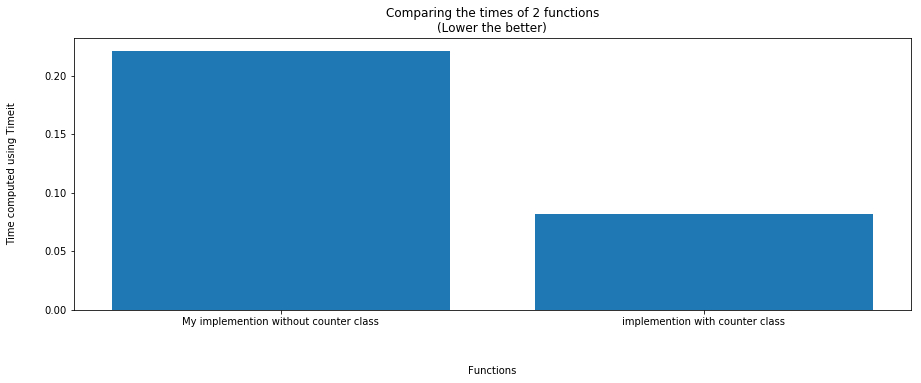

In [531]:
plt.rcParams["figure.figsize"] = [15,5]

bars = plt.bar(range(len(functionList)), timeList)
plt.title("Comparing the times of 2 functions\n(Lower the better)")

plt.xlabel("\n\n\nFunctions")
plt.ylabel("Time computed using Timeit\n\n")
plt.xticks(range(len(functionList)), functionList)

plt.show()

# Part C. PyTest for Regex
Write a function using regexes that tests whether a string is a valid email address. Here we define a valid
email address as having four parts:
1. local part: any characters in the set A-Z,a-z,0-9 or dot '.' where the dot cannot be the first or the last character
2. the '@' symbol
3. domain1: any character in A-Z, a-z, or underscore '_' provided the underscore is not the first or last character
4. domain2: one of .com, .org, .edu

For this, I'm creating a isValidEmail function, Splitting it into the 4 mentioned parts & then using regex to check it's validity

In [532]:
def isValidEmail(email) :
    parts = email.split('@')
    if len(parts)!= 2 :
        return False
    localPart = parts[0]
    if len(parts[1].split('.')) !=2 :
        return False
    domain1 = parts[1].split('.')[0]
    domain2 = '.'+parts[1].split('.')[1]
    if re.fullmatch('\.(edu|org|com)',domain2) is  None :
        return False
    if re.fullmatch('(^(?!\_)[A-Za-z\_0-9]*){1}(?<!\_)',domain1) is  None :
        return False
    if re.fullmatch('(^(?!\.)[A-Za-z\.0-9]*){1}(?<!\.)',localPart) is  None :
        return False
    return True
    


# test for @ symbal
assert isValidEmail('rvai@shya@smu.edu') == False
assert isValidEmail('rvaishyasmu.edu') == False
assert isValidEmail('rvaishya@smu.edu') == True


# test for local part
assert isValidEmail('rv.aishya@smu.edu') == True
assert isValidEmail('rv,aishya@smu.edu') == False
assert isValidEmail('rvaishya.@smu.edu') == False
assert isValidEmail('.rvaishya@smu.edu') == False

# test for Domain 1
assert isValidEmail('rvaishya@sm.u.edu') == False
assert isValidEmail('rvaishya@s_mu.edu') == True
assert isValidEmail('rvaishya@smu_.edu') == False
assert isValidEmail('rvaishya@_smu.edu') == False

# test for Domain 2
assert isValidEmail('rvaishya@smu.edu') == True
assert isValidEmail('rvaishya@smu.org') == True
assert isValidEmail('rvaishya@smu.com') == True
assert isValidEmail('rvaishya@smu.net') == False

print ('*** All assertions executed without Error !!!!!!! ***')

*** All assertions executed without Error !!!!!!! ***


## Part D. CSV Files
1. Download the file worldcup.csv from Canvas
2. Use the Python csv module to extract the data and create json from the csv with one json object for each row of data.
3. Write code to display the json for the world cups with the 5 greatest total goals scored
4. Extract the year total goals scored and use PyPlot to plot a bar chart of the goals (y-axis) vs year (x-axis) 

<br>
So here we open CSV file, read data & store it in list, create json from list using 'dump' function & print it

In [533]:
import csv
import json
csvfile = open(r'D:\\Documents\Notes\CSE - 7345 - Advance Application Programming\Assignment 3\worldcup.csv', 'r')
reader = csv.DictReader(csvfile)
jsonList = list(reader)

# creating json from the csv with one json object for each row of data.
JsonObject = json.dumps(jsonList)
print (JsonObject)

[{"WorldCup": "wc1930", "year": "1930", "location": "Uruguay", "first": "Uruguay", "second": "Argentina", "third": "USA", "fourth": "Yugoslavia", "goalsScored": "70", "matchesPlayed": "18", "attendance": "590549"}, {"WorldCup": "wc1934", "year": "1934", "location": "Italy", "first": "Italy", "second": "Czechoslovakia", "third": "Germany", "fourth": "Austria", "goalsScored": "70", "matchesPlayed": "17", "attendance": "363000"}, {"WorldCup": "wc1938", "year": "1938", "location": "France", "first": "Italy", "second": "Hungary", "third": "Brazil", "fourth": "Sweden", "goalsScored": "84", "matchesPlayed": "18", "attendance": "375000"}, {"WorldCup": "wc1950", "year": "1950", "location": "Brazil", "first": "Uruguay", "second": "Brazil", "third": "Sweden", "fourth": "Spain", "goalsScored": "88", "matchesPlayed": "22", "attendance": "1045246"}, {"WorldCup": "wc1954", "year": "1954", "location": "Switzerland", "first": "GermanyFR", "second": "Hungary", "third": "Austria", "fourth": "Uruguay", "g

<br>
After we've have the json list, we'll loop through it to sort the 5 highest goal scoring worldcups to be at the top
<br><br>

In [534]:
#starting from the 6th element to the last, to compare it with the 1st 5
for i in range(5,len(jsonList)) :
    # from 1st to 5th element
    for k in range(5):
        # comparing to put the 5 highest goalscored to be in top 5 index of list
        if(int(jsonList[i]['goalsScored']) > int(jsonList[k]['goalsScored'])):
                # swapping        
                jsonList[k], jsonList[i] = jsonList[i], jsonList[k]

# creating JSON by extratcing the top 5 elements from list  
topFiveData = json.dumps(jsonList[:5], indent=4, sort_keys=True)

print (topFiveData)

[
    {
        "WorldCup": "wc1998",
        "attendance": "2785100",
        "first": "France",
        "fourth": "Netherlands",
        "goalsScored": "171",
        "location": "France",
        "matchesPlayed": "64",
        "second": "Brazil",
        "third": "Croatia",
        "year": "1998"
    },
    {
        "WorldCup": "wc2014",
        "attendance": "3386810",
        "first": "Germany",
        "fourth": "Brazil",
        "goalsScored": "171",
        "location": "Brazil",
        "matchesPlayed": "64",
        "second": "Argentina",
        "third": "Netherlands",
        "year": "2014"
    },
    {
        "WorldCup": "wc2018",
        "attendance": "3430000 ",
        "first": "France",
        "fourth": "England",
        "goalsScored": "169",
        "location": "Russia",
        "matchesPlayed": "64",
        "second": "Croatia",
        "third": "Belgium",
        "year": "2018"
    },
    {
        "WorldCup": "wc2002",
        "attendance": "2705197",
        "f

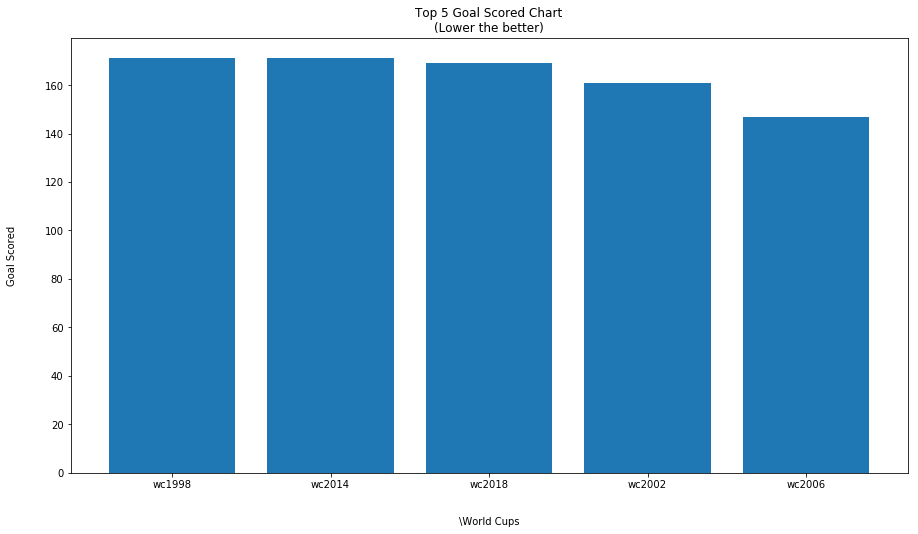

In [535]:
    
goalScoredList  = [int(x['goalsScored']) for x in jsonList[:5]]
worldCupList  = [x['WorldCup'] for x in jsonList[:5]]

plt.rcParams["figure.figsize"] = [15,8]

bars = plt.bar(range(len(worldCupList)), goalScoredList)
plt.title("Top 5 Goal Scored Chart\n(Lower the better)")

plt.xlabel("\n\n\World Cups")
plt.ylabel("Goal Scored\n\n")
plt.xticks(range(len(worldCupList)), worldCupList)

plt.show()
